**Diabetes Patient Predictions**

---

Decision Tree & Classification

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df['BMI'].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

In [ ]:
mean_bmi = df['BMI'].mean()
df['BMI'] = df['BMI'].replace(0, mean_bmi)

In [ ]:
df['BMI'].value_counts()

BMI
32.000000    13
31.600000    12
31.200000    12
31.992578    11
32.400000    10
             ..
36.700000     1
41.800000     1
42.600000     1
42.800000     1
46.300000     1
Name: count, Length: 248, dtype: int64

In [ ]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [ ]:
median_preg = df['Pregnancies'].median()
df['Pregnancies'] = df['Pregnancies'].replace(0, median_preg)

In [ ]:
df['Pregnancies'].value_counts()

Pregnancies
3     186
1     135
2     103
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)

df['Glucose']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [ ]:
mean_glucose = df['Glucose'].mean()
df['Glucose'] = df['Glucose'].replace(0, mean_glucose)

In [ ]:
df['Glucose'].value_counts()

Glucose
99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: count, Length: 136, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)

df['Glucose']

0      148.000000
1       85.000000
2      183.000000
3       89.000000
4      137.000000
5      116.000000
6       78.000000
7      115.000000
8      197.000000
9      125.000000
10     110.000000
11     168.000000
12     139.000000
13     189.000000
14     166.000000
15     100.000000
16     118.000000
17     107.000000
18     103.000000
19     115.000000
20     126.000000
21      99.000000
22     196.000000
23     119.000000
24     143.000000
25     125.000000
26     147.000000
27      97.000000
28     145.000000
29     117.000000
30     109.000000
31     158.000000
32      88.000000
33      92.000000
34     122.000000
35     103.000000
36     138.000000
37     102.000000
38      90.000000
39     111.000000
40     180.000000
41     133.000000
42     106.000000
43     171.000000
44     159.000000
45     180.000000
46     146.000000
47      71.000000
48     103.000000
49     105.000000
50     103.000000
51     101.000000
52      88.000000
53     176.000000
54     150.000000
55      73

In [ ]:
df['BloodPressure'].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

In [ ]:
mean_BP = df['BloodPressure'].mean()
df['BloodPressure'] = df['BloodPressure'].replace(0, mean_BP)

In [ ]:
df['BloodPressure'].value_counts()

BloodPressure
70.000000     57
74.000000     52
78.000000     45
68.000000     45
72.000000     44
64.000000     43
80.000000     40
76.000000     39
60.000000     37
69.105469     35
62.000000     34
66.000000     30
82.000000     30
88.000000     25
84.000000     23
90.000000     22
86.000000     21
58.000000     21
50.000000     13
56.000000     12
52.000000     11
54.000000     11
75.000000      8
92.000000      8
65.000000      7
85.000000      6
94.000000      6
48.000000      5
96.000000      4
44.000000      4
100.000000     3
106.000000     3
98.000000      3
110.000000     3
55.000000      2
108.000000     2
104.000000     2
46.000000      2
30.000000      2
122.000000     1
95.000000      1
102.000000     1
61.000000      1
24.000000      1
38.000000      1
40.000000      1
114.000000     1
Name: count, dtype: int64

In [ ]:
df['SkinThickness'].value_counts()

SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: count, dtype: int64

In [ ]:
median_skin = df['SkinThickness'].median()
df['SkinThickness'] = df['SkinThickness'].replace(0, median_skin)

In [ ]:
df['SkinThickness'].value_counts()

SkinThickness
23    249
32     31
30     27
27     23
28     20
33     20
18     20
31     19
19     18
39     18
29     17
25     16
37     16
40     16
22     16
26     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
45      6
16      6
43      6
11      6
14      6
44      5
10      5
47      4
48      4
50      3
49      3
54      2
7       2
52      2
8       2
56      1
51      1
60      1
63      1
99      1
Name: count, dtype: int64

In [ ]:
df['Insulin'].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
94       7
180      7
100      7
135      6
115      6
110      6
66       5
56       5
49       5
76       5
210      5
54       4
71       4
160      4
190      4
168      4
88       4
200      4
165      4
64       4
155      4
125      4
90       4
74       3
75       3
145      3
50       3
175      3
92       3
325      3
63       3
215      3
194      3
45       3
156      3
182      3
83       3
48       3
44       3
106      3
176      3
36       3
82       3
70       3
126      3
95       2
87       2
79       2
60       2
480      2
144      2
170      2
158      2
150      2
148      2
67       2
132      2
116      2
167      2
231      2
185      2
122      2
85       2
77       2
205      2
265      2
293      2
57       2
230      2
58       2
37       2
495      2
192      2
207      2
18       2
53       2
99       2
152      2
114      2
40       2
285      2
240      2
78       2
220      2
23       2
55

In [ ]:
median_insulin = df['Insulin'].median()
df['Insulin'] = df['Insulin'].replace(0, median_insulin)

In [ ]:
df['Insulin'].value_counts()

Insulin
30.5     374
105.0     11
130.0      9
140.0      9
120.0      8
94.0       7
180.0      7
100.0      7
135.0      6
115.0      6
110.0      6
66.0       5
56.0       5
49.0       5
76.0       5
210.0      5
54.0       4
71.0       4
160.0      4
190.0      4
168.0      4
88.0       4
200.0      4
165.0      4
64.0       4
155.0      4
125.0      4
90.0       4
74.0       3
75.0       3
145.0      3
50.0       3
175.0      3
92.0       3
325.0      3
63.0       3
215.0      3
194.0      3
45.0       3
156.0      3
182.0      3
83.0       3
48.0       3
44.0       3
106.0      3
176.0      3
36.0       3
82.0       3
70.0       3
126.0      3
95.0       2
87.0       2
79.0       2
60.0       2
480.0      2
144.0      2
170.0      2
158.0      2
150.0      2
148.0      2
67.0       2
132.0      2
116.0      2
167.0      2
231.0      2
185.0      2
122.0      2
85.0       2
77.0       2
205.0      2
265.0      2
293.0      2
57.0       2
230.0      2
58.0       2
37.0       2
495.

In [ ]:
df['DiabetesPedigreeFunction'].value_counts()

DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
0.259    5
0.238    5
0.190    4
0.263    4
0.299    4
0.692    4
0.270    4
0.551    4
0.304    4
0.237    4
0.197    4
0.284    4
0.687    4
0.167    4
0.260    4
0.245    4
0.142    3
0.422    3
0.187    3
0.294    3
0.235    3
0.305    3
0.443    3
0.178    3
0.165    3
0.292    3
0.236    3
0.280    3
0.389    3
0.349    3
0.583    3
0.340    3
0.520    3
0.256    3
0.587    3
0.391    3
0.496    3
0.151    3
0.452    3
0.141    3
0.200    3
0.148    3
0.337    3
0.257    3
0.205    3
0.647    2
0.368    2
0.088    2
0.412    2
0.433    2
0.400    2
0.403    2
0.434    2
0.361    2
0.875    2
0.313    2
0.204    2
0.466    2
0.159    2
0.637    2
0.286    2
0.326    2
0.126    2
0.137    2
0.839    2
0.218    2
0.085    2
0.654    2
0.471    2
0.121    2
0.164    2
0.591    2
0.514    2
1.224    2
0.314    2
0.209    2
0.968    2
0.198    2
0.652    2
0.557    2
0.293    2
0.686    2
0.249    2
0.582  

In [ ]:
pd.set_option('display.max_rows', None)

df['DiabetesPedigreeFunction']

0      0.627
1      0.351
2      0.672
3      0.167
4      2.288
5      0.201
6      0.248
7      0.134
8      0.158
9      0.232
10     0.191
11     0.537
12     1.441
13     0.398
14     0.587
15     0.484
16     0.551
17     0.254
18     0.183
19     0.529
20     0.704
21     0.388
22     0.451
23     0.263
24     0.254
25     0.205
26     0.257
27     0.487
28     0.245
29     0.337
30     0.546
31     0.851
32     0.267
33     0.188
34     0.512
35     0.966
36     0.420
37     0.665
38     0.503
39     1.390
40     0.271
41     0.696
42     0.235
43     0.721
44     0.294
45     1.893
46     0.564
47     0.586
48     0.344
49     0.305
50     0.491
51     0.526
52     0.342
53     0.467
54     0.718
55     0.248
56     0.254
57     0.962
58     1.781
59     0.173
60     0.304
61     0.270
62     0.587
63     0.699
64     0.258
65     0.203
66     0.855
67     0.845
68     0.334
69     0.189
70     0.867
71     0.411
72     0.583
73     0.231
74     0.396
75     0.140
76     0.391

In [ ]:
df['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [ ]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.681605,72.254807,27.334635,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.021516,30.436016,12.115932,9.229014,105.547598,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

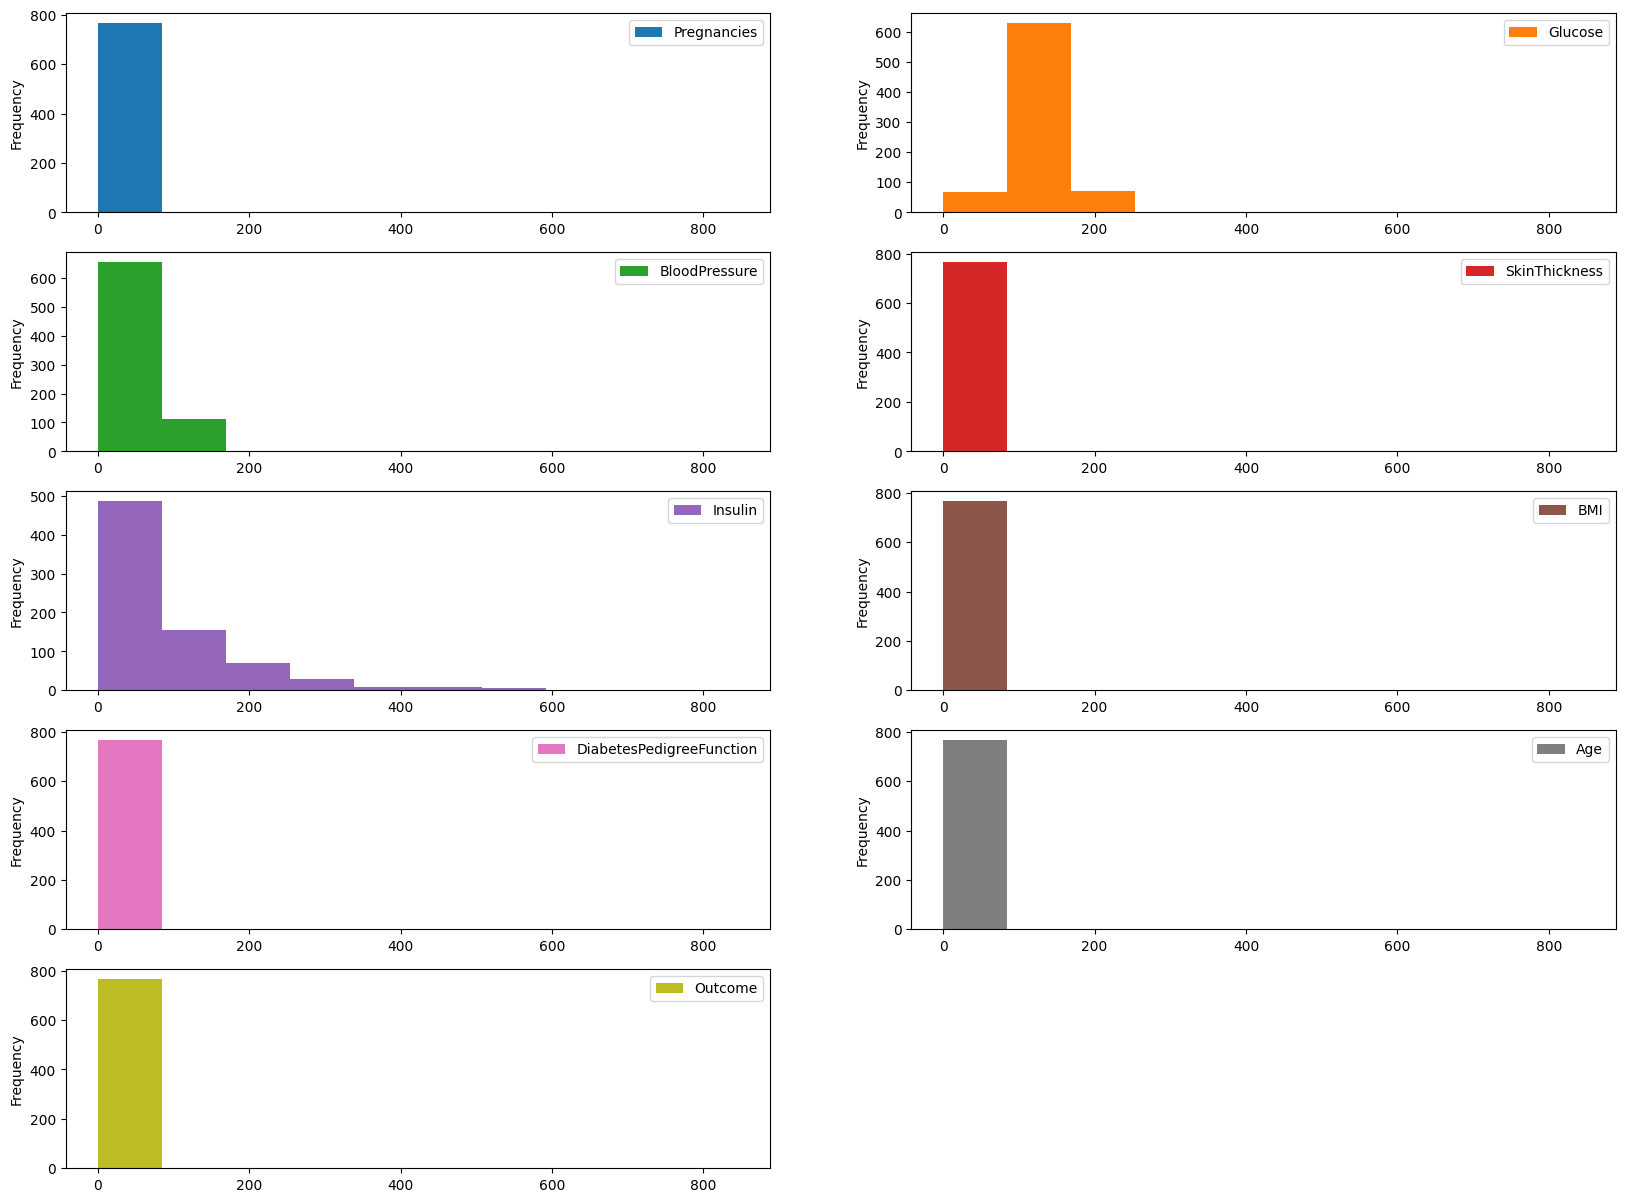

In [ ]:
#histogram

plt.rcParams['figure.figsize'] = (20,15)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

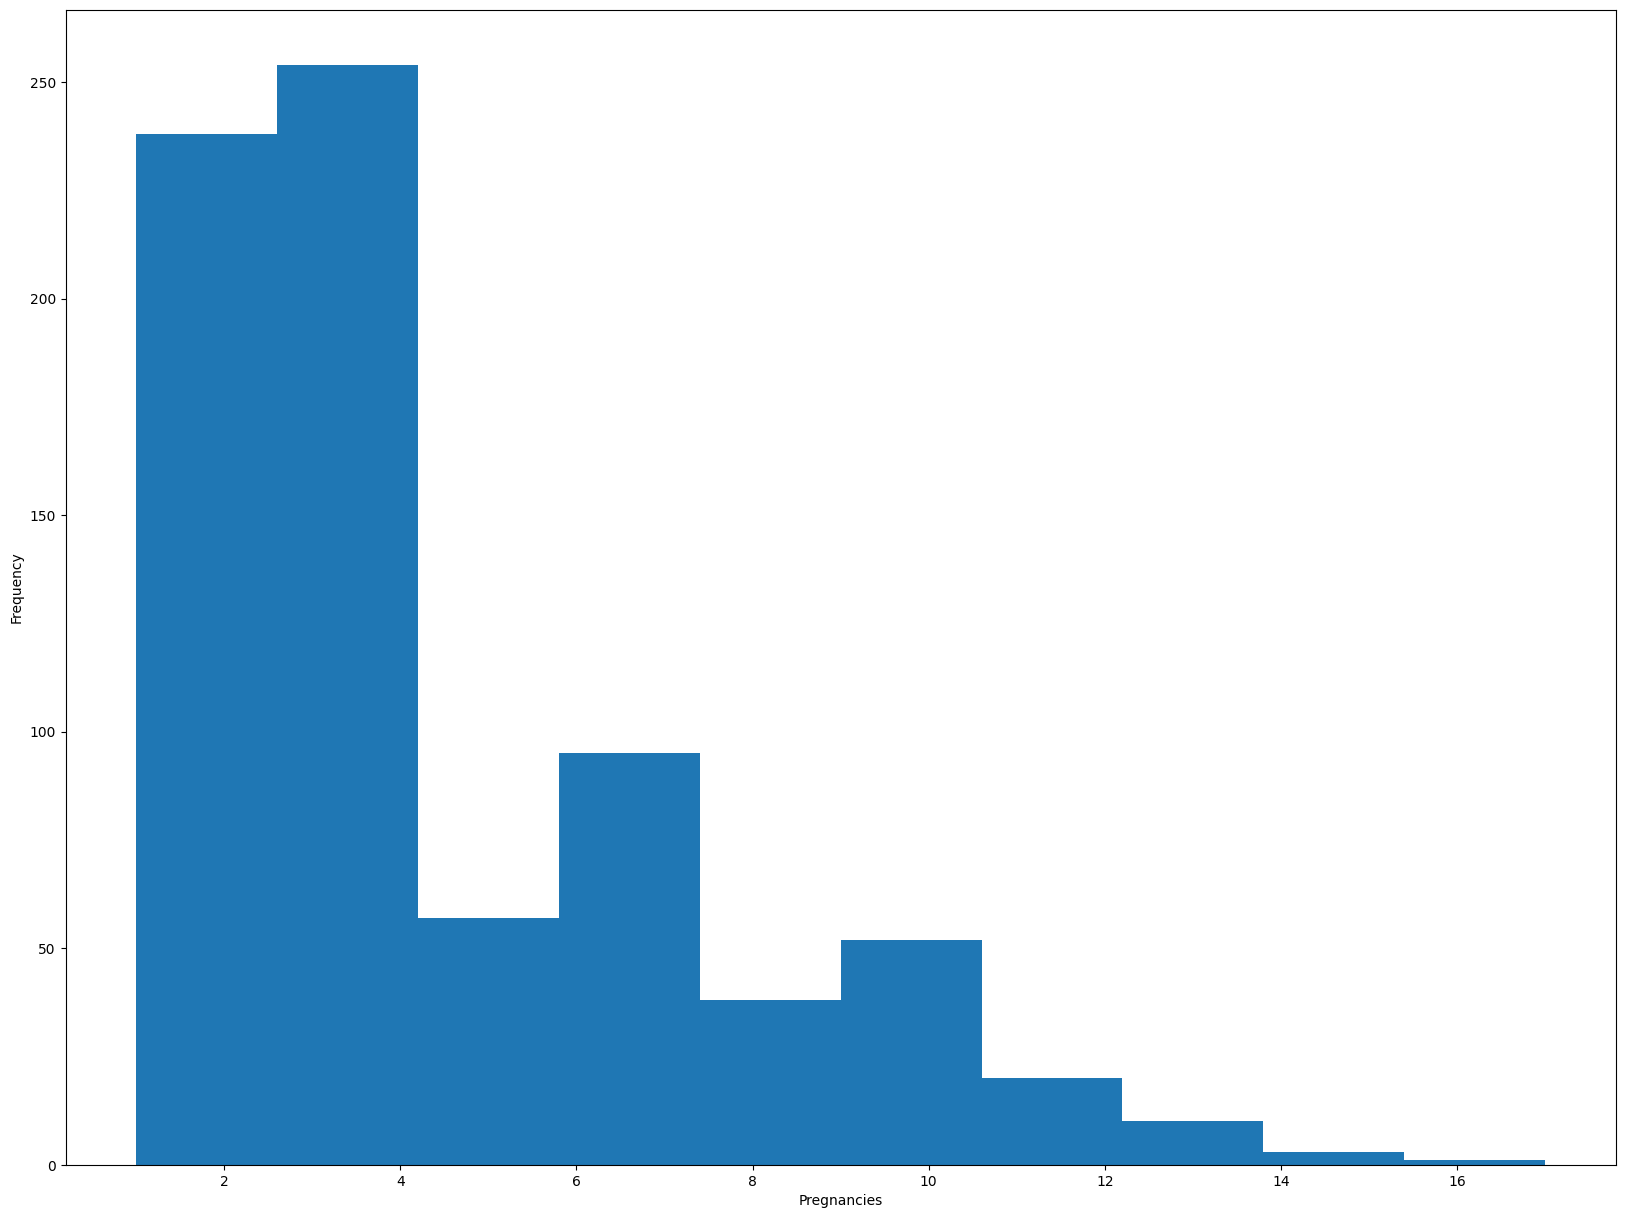

In [ ]:
plt.hist(df['Pregnancies'], bins = 10)
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

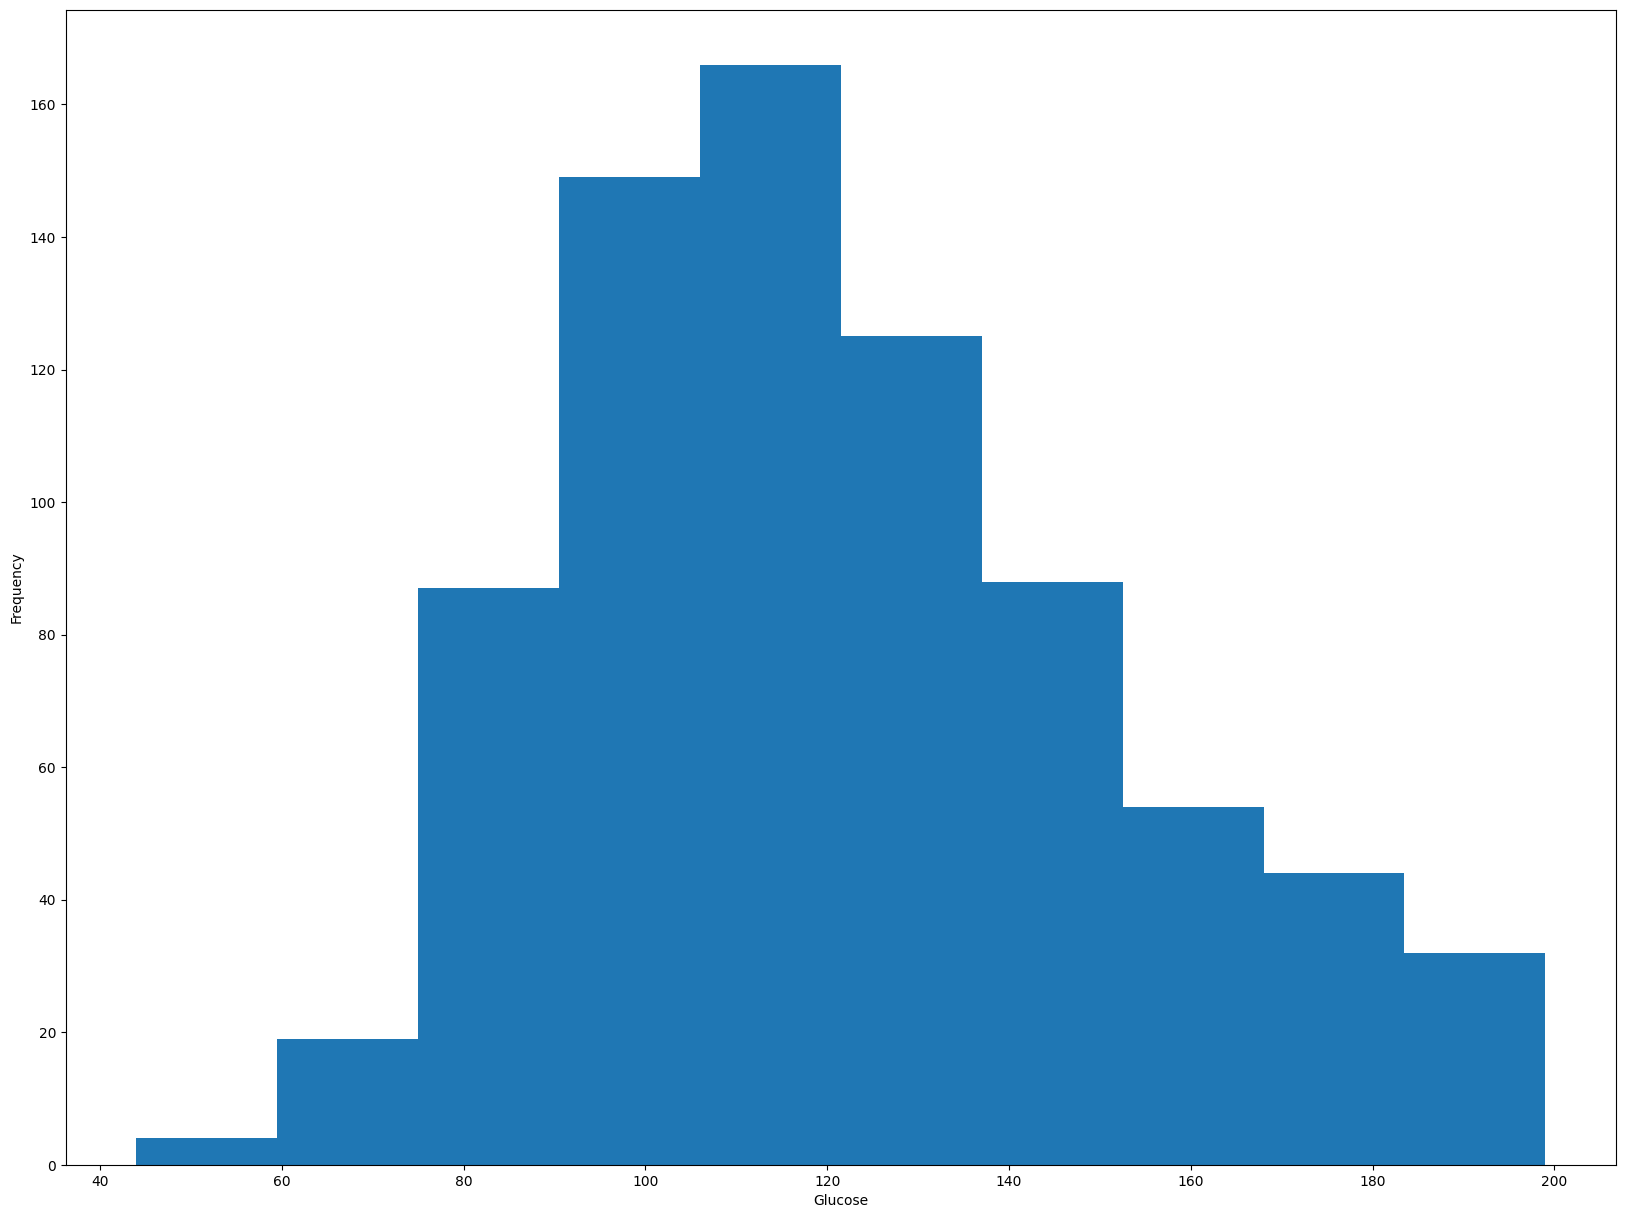

In [ ]:
plt.hist(df['Glucose'], bins = 10)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

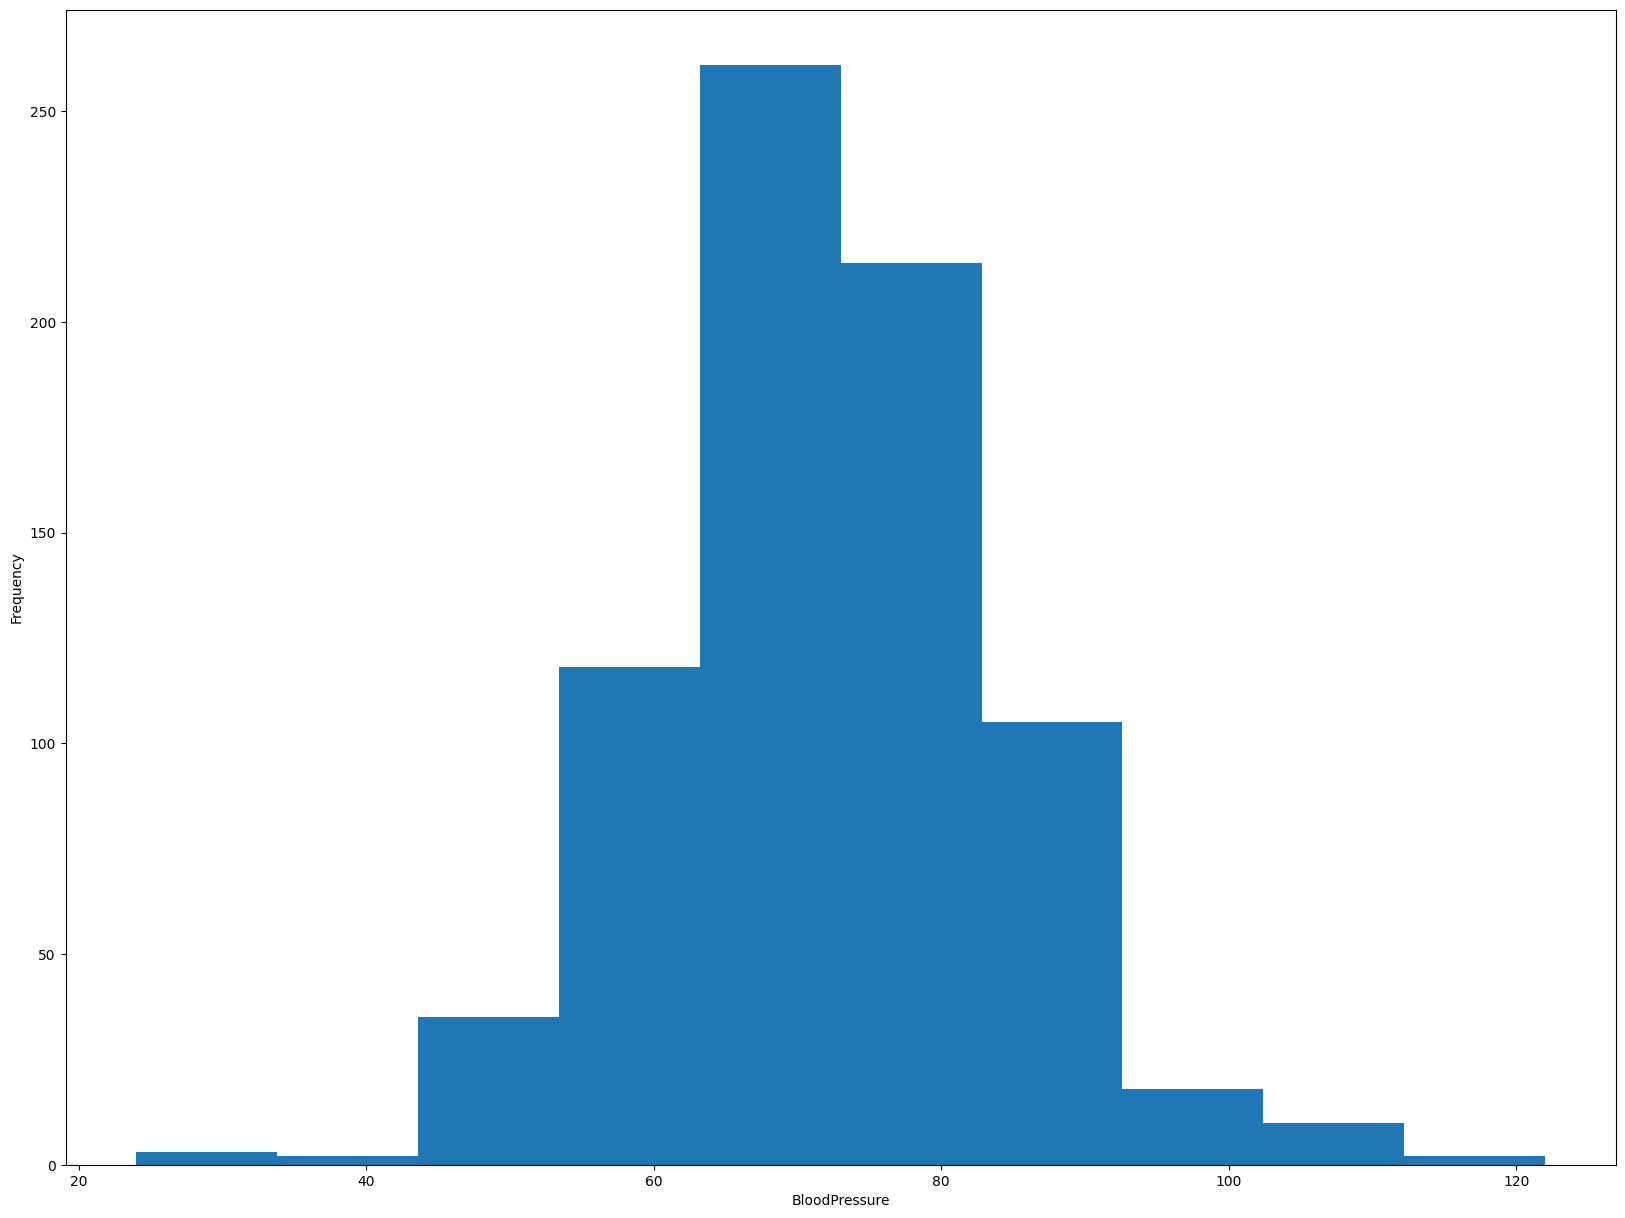

In [ ]:
plt.hist(df['BloodPressure'], bins = 10)
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.show()

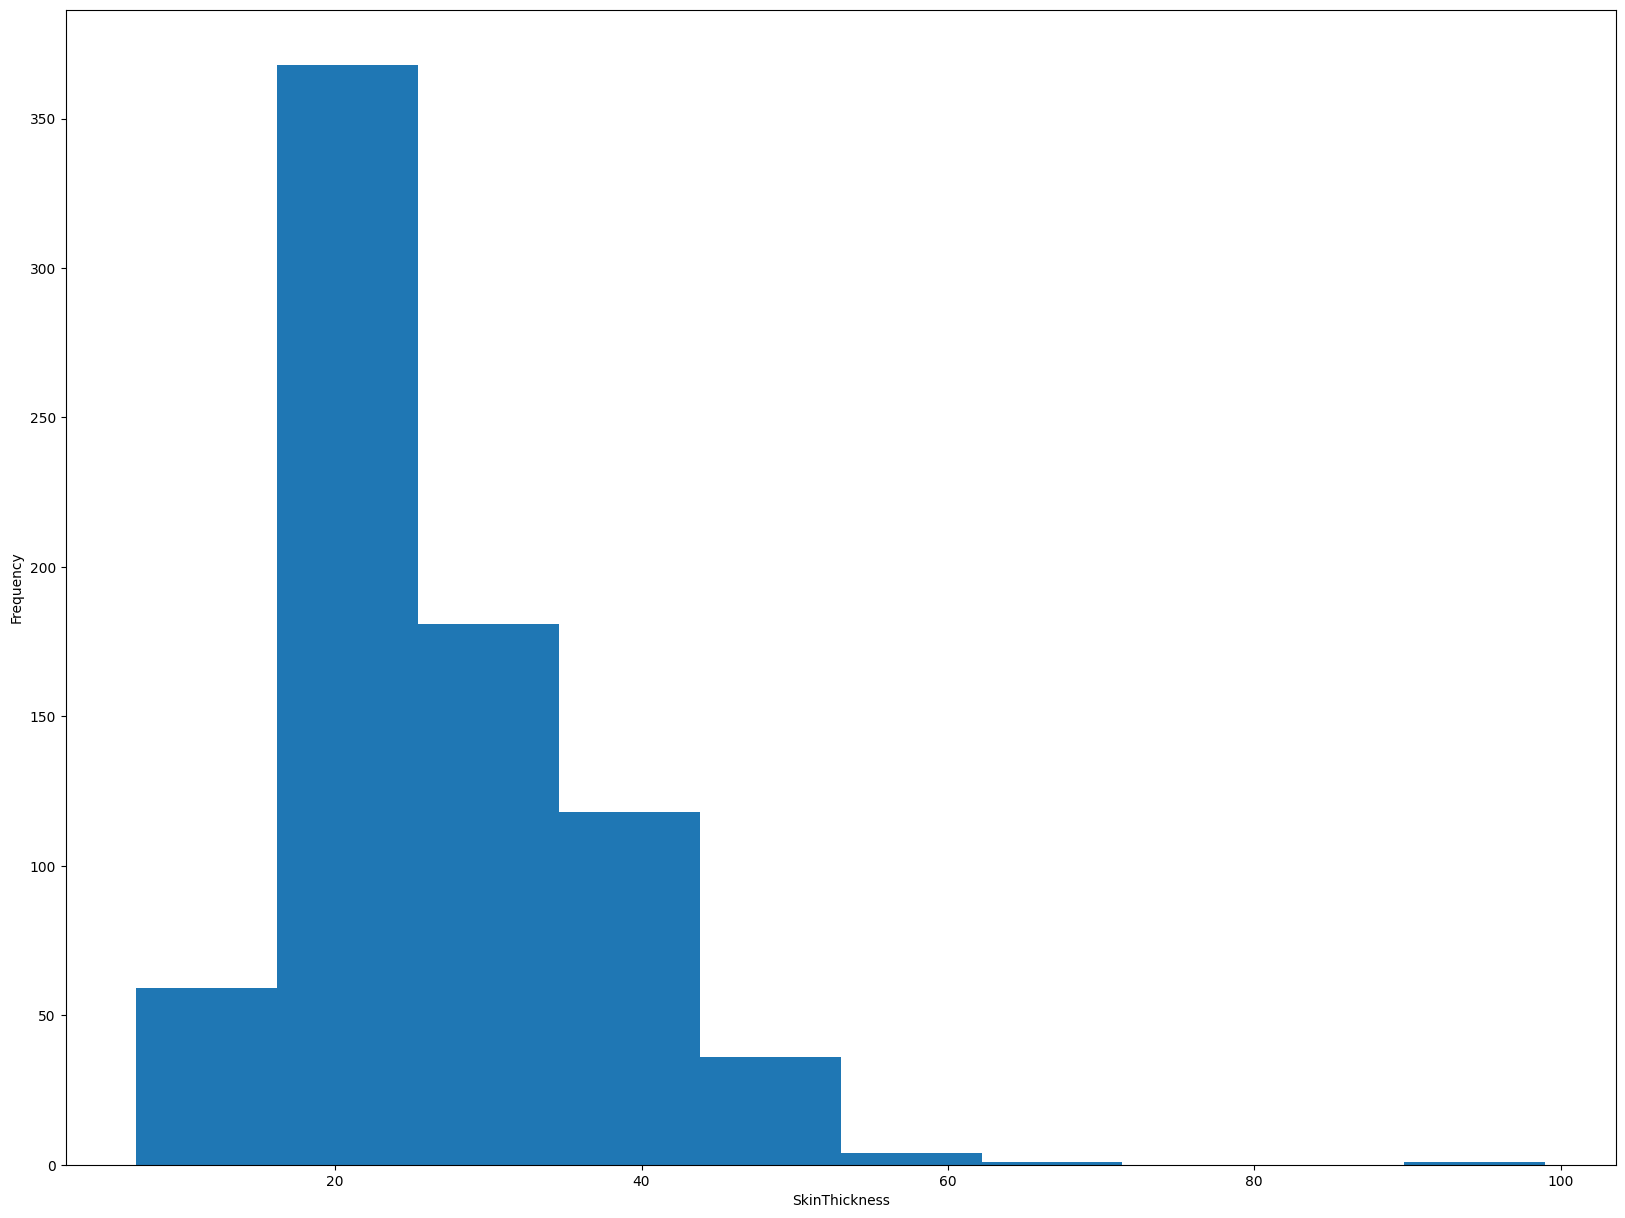

In [ ]:
plt.hist(df['SkinThickness'], bins = 10)
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.show()

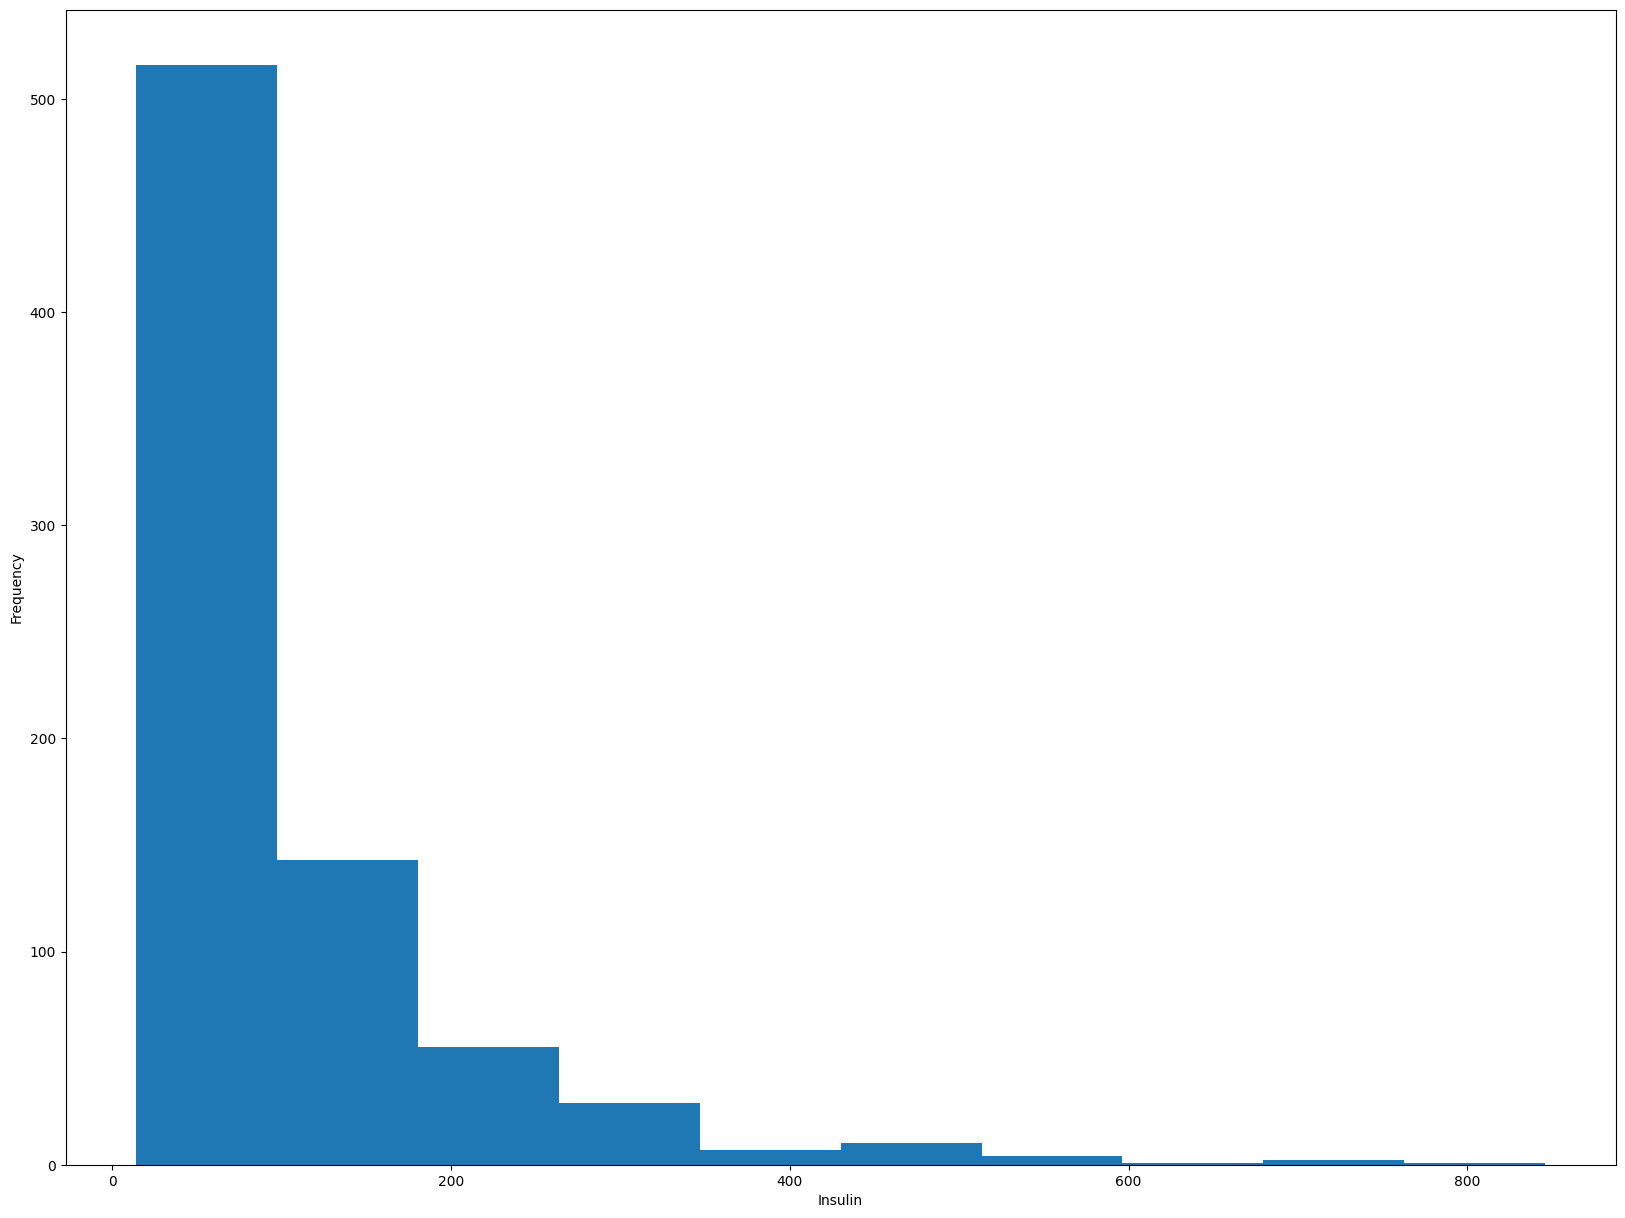

In [ ]:
plt.hist(df['Insulin'], bins = 10)
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

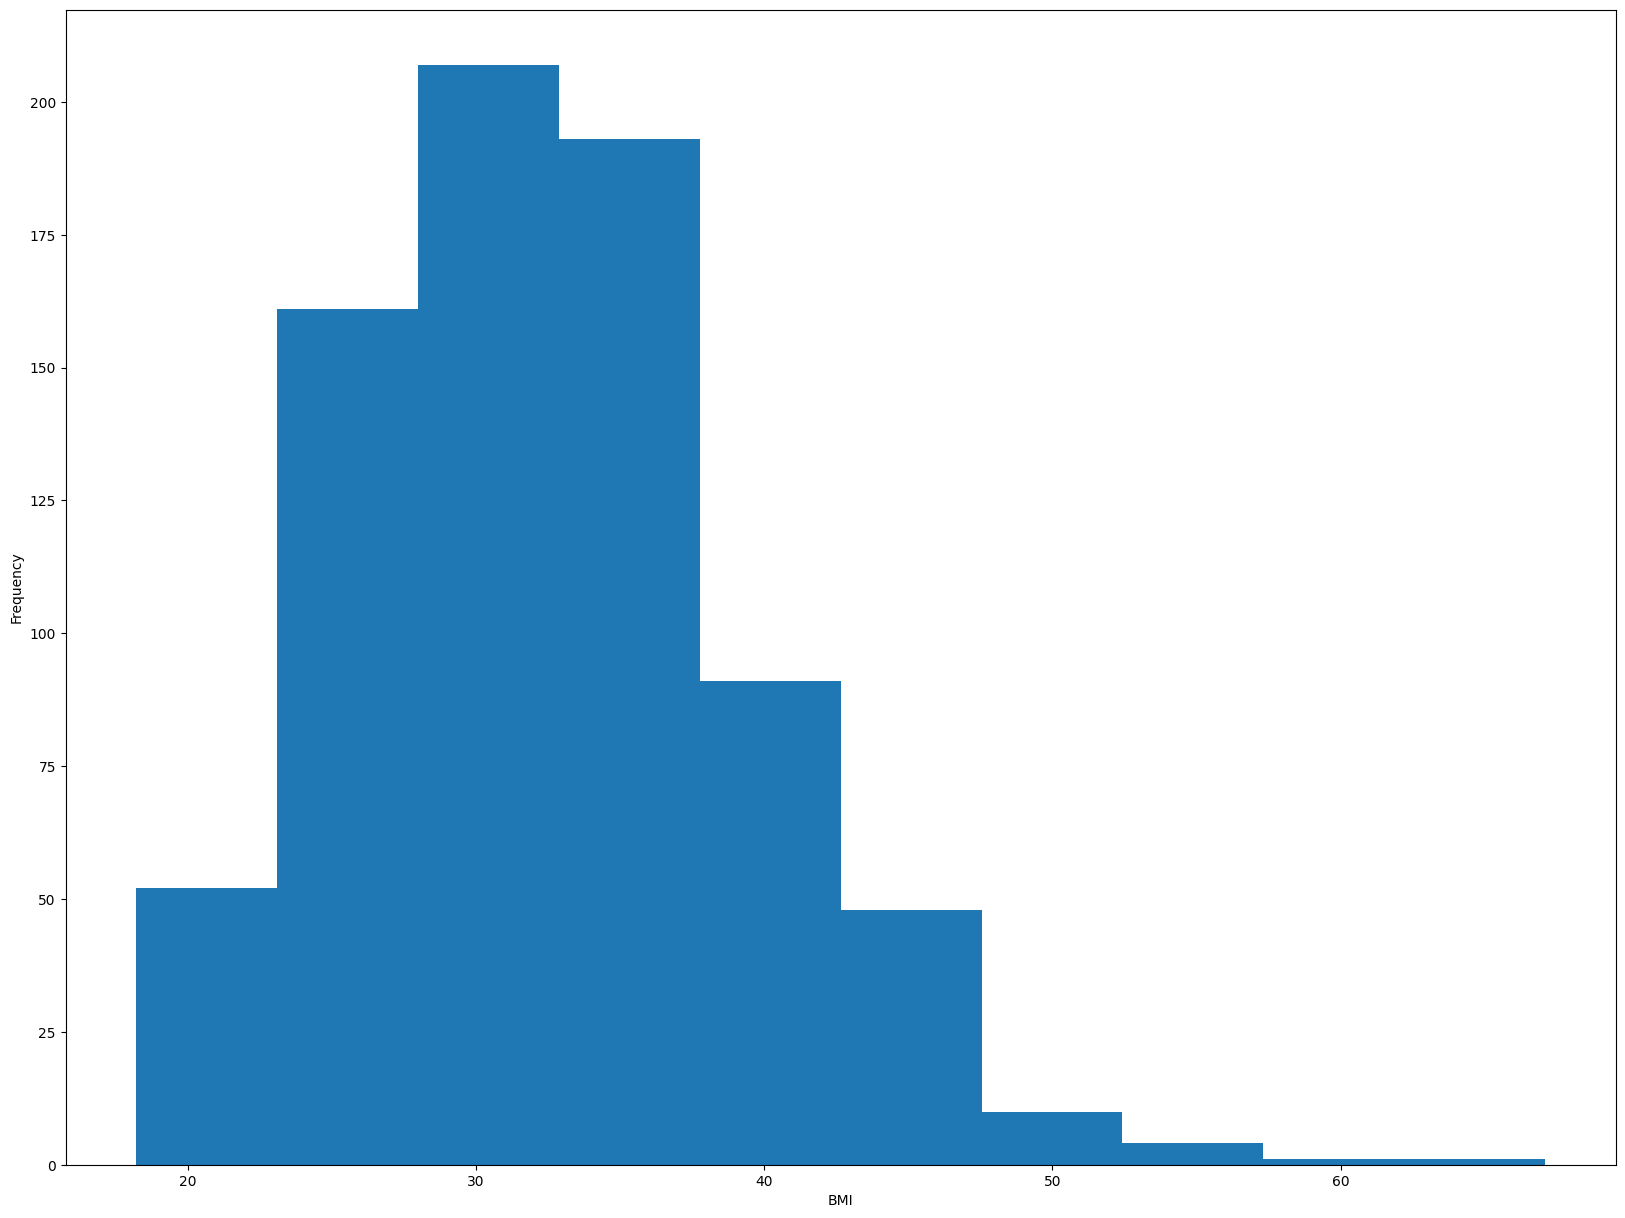

In [ ]:
plt.hist(df['BMI'], bins = 10)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

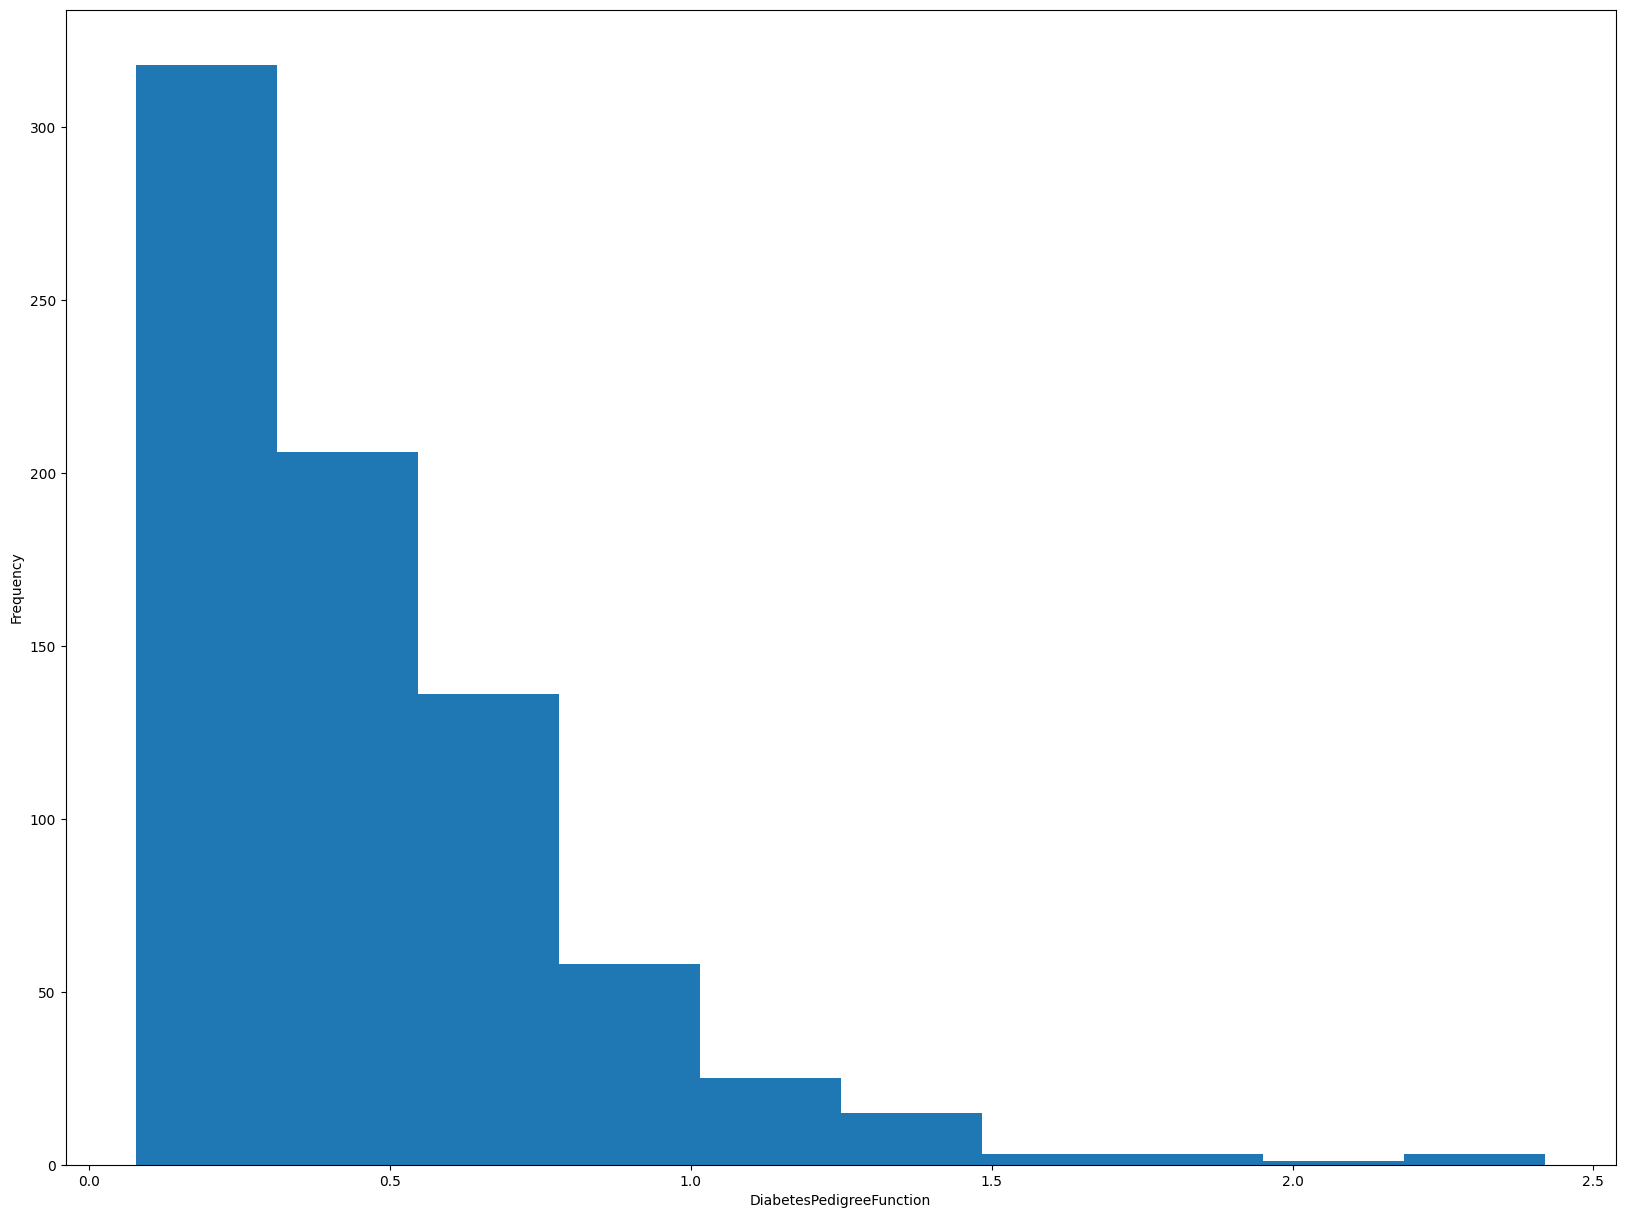

In [ ]:
plt.hist(df['DiabetesPedigreeFunction'], bins = 10)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')
plt.show()

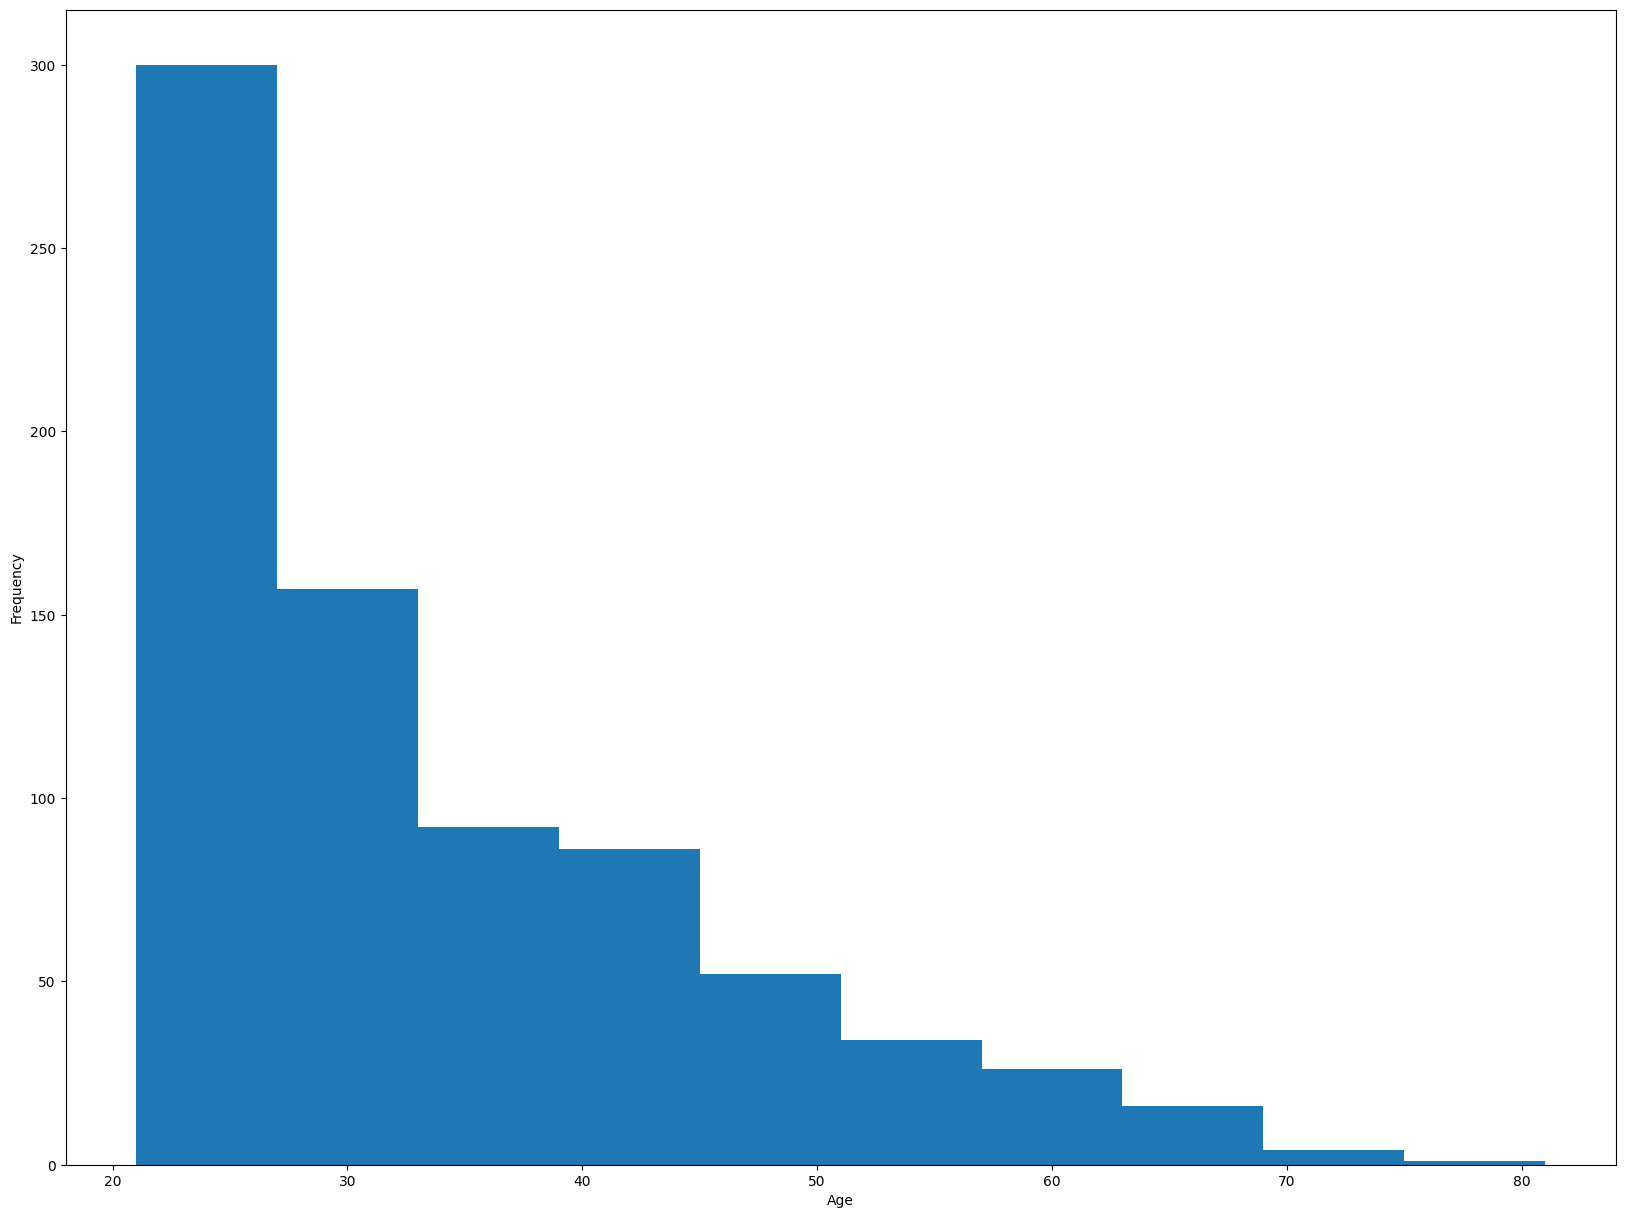

In [ ]:
plt.hist(df['Age'], bins = 10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

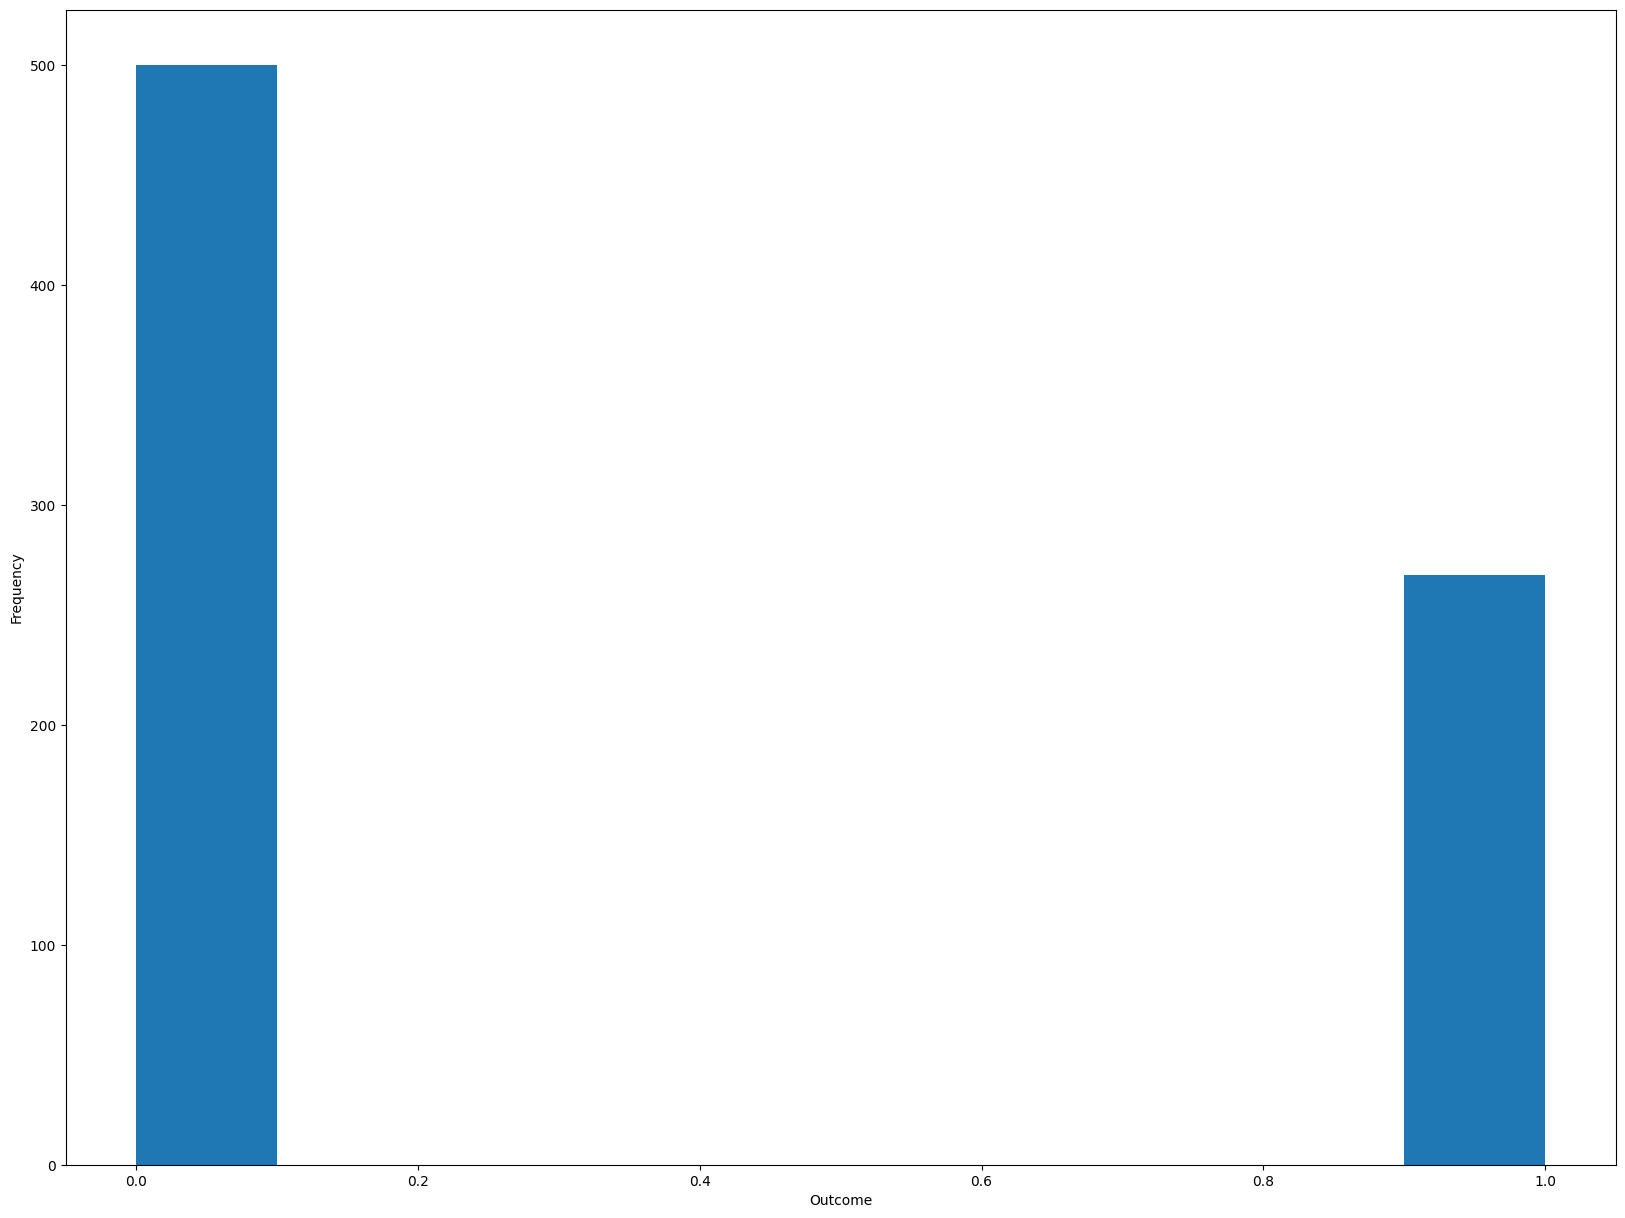

In [ ]:
plt.hist(df['Outcome'], bins = 10)
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.148929,0.246388,0.060706,-0.059580,0.080538,-0.016151,0.538169,0.245466
Glucose,0.148929,1.000000,0.219666,0.172361,0.357081,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.246388,0.219666,1.000000,0.152458,-0.022049,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.060706,0.172361,0.152458,1.000000,0.238188,0.546958,0.142977,0.054514,0.189065
Insulin,-0.059580,0.357081,-0.022049,0.238188,1.000000,0.189031,0.178029,-0.015413,0.148457
BMI,0.080538,0.231478,0.281231,0.546958,0.189031,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.016151,0.137106,0.000371,0.142977,0.178029,0.153508,1.000000,0.033561,0.173844
Age,0.538169,0.266600,0.326740,0.054514,-0.015413,0.025748,0.033561,1.000000,0.238356
Outcome,0.245466,0.492908,0.162986,0.189065,0.148457,0.312254,0.173844,0.238356,1.000000


In [ ]:
df.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.681605,72.254807,27.334635,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.021516,30.436016,12.115932,9.229014,105.547598,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#from sklearn.preprocessing import StandardScaler
#normalization
#scaler = StandardScaler()
#df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

# Select the columns to normalize
#cols_to_normalize = ['Glucose', 'BloodPressure', 'BMI', 'Pregnancies', 'SkinThickness', 'Insulin', 'Age']

# Create a scaler object
#scaler = MinMaxScaler()

# Fit the scaler to the selected columns and transform them
#df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

In [ ]:
#if you want to use normalization, please choose one method only
#the resulf will differ if you mix the method

In [ ]:
#min - max

#df['Glucose'] = (df['Glucose'] - (df['Glucose'].min()))/(df['Glucose'].max() - df['Glucose'].min())

#df['Glucose'].describe(include='all')

In [ ]:
#z-score

df['Glucose'] = (df['Glucose'] - df['Glucose'].mean()) / df['Glucose'].std()

df['Glucose'].describe(include='all')

count    7.680000e+02
mean    -1.480297e-16
std      1.000000e+00
min     -2.552292e+00
25%     -7.205807e-01
50%     -1.538179e-01
75%      6.100797e-01
max      2.540359e+00
Name: Glucose, dtype: float64

In [ ]:
#df['Glucose'] = df['Glucose']/df['Glucose'].max()

#df['Glucose'].describe(include='all')

In [ ]:
#z-score

df['Pregnancies'] = (df['Pregnancies'] - df['Pregnancies'].mean()) / df['Pregnancies'].std()

df['Pregnancies'].describe(include='all')

count    7.680000e+02
mean     1.202742e-16
std      1.000000e+00
min     -1.085100e+00
25%     -7.541400e-01
50%     -4.231803e-01
75%      5.696989e-01
max      4.210256e+00
Name: Pregnancies, dtype: float64

In [ ]:
#z-score

df['BloodPressure'] = (df['BloodPressure'] - df['BloodPressure'].mean()) / df['BloodPressure'].std()

df['BloodPressure'].describe(include='all')

count    7.680000e+02
mean    -8.095376e-18
std      1.000000e+00
min     -3.982757e+00
25%     -6.813183e-01
50%     -2.103070e-02
75%      6.392570e-01
max      4.105767e+00
Name: BloodPressure, dtype: float64

In [ ]:
#z-score

df['SkinThickness'] = (df['SkinThickness'] - df['SkinThickness'].mean()) / df['SkinThickness'].std()

df['SkinThickness'].describe(include='all')

count    7.680000e+02
mean    -1.249001e-16
std      1.000000e+00
min     -2.203338e+00
25%     -4.696748e-01
50%     -4.696748e-01
75%      5.055106e-01
max      7.765224e+00
Name: SkinThickness, dtype: float64

In [ ]:
#z-score

df['Insulin'] = (df['Insulin'] - df['Insulin'].mean()) / df['Insulin'].std()

df['Insulin'].describe(include='all')

count    7.680000e+02
mean     4.625929e-17
std      1.000000e+00
min     -7.641324e-01
25%     -6.078049e-01
50%     -6.006991e-01
75%      3.088432e-01
max      7.118567e+00
Name: Insulin, dtype: float64

In [ ]:
#z-score

df['BMI'] = (df['BMI'] - df['BMI'].mean()) / df['BMI'].std()

df['BMI'].describe(include='all')

count    7.680000e+02
mean    -2.891206e-16
std      1.000000e+00
min     -2.072732e+00
25%     -7.200780e-01
50%     -6.556810e-02
75%      6.034865e-01
max      5.039609e+00
Name: BMI, dtype: float64

In [ ]:
#z-score

df['Glucose'] = (df['Glucose'] - df['Glucose'].mean()) / df['Glucose'].std()

df['Glucose'].describe(include='all')

count    7.680000e+02
mean    -2.312965e-18
std      1.000000e+00
min     -2.552292e+00
25%     -7.205807e-01
50%     -1.538179e-01
75%      6.100797e-01
max      2.540359e+00
Name: Glucose, dtype: float64

In [ ]:
#z-score

df['Glucose'] = (df['Glucose'] - df['Glucose'].mean()) / df['Glucose'].std()

df['Glucose'].describe(include='all')

count    7.680000e+02
mean    -2.312965e-18
std      1.000000e+00
min     -2.552292e+00
25%     -7.205807e-01
50%     -1.538179e-01
75%      6.100797e-01
max      2.540359e+00
Name: Glucose, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [ ]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000,768.000000,768.000000
mean,1.202742e-16,-2.312965e-18,-8.095376e-18,-1.249001e-16,4.625929e-17,-2.891206e-16,0.471876,33.240885,0.348958
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.331329,11.760232,0.476951
min,-1.085100e+00,-2.552292e+00,-3.982757e+00,-2.203338e+00,-7.641324e-01,-2.072732e+00,0.078000,21.000000,0.000000
25%,-7.541400e-01,-7.205807e-01,-6.813183e-01,-4.696748e-01,-6.078049e-01,-7.200780e-01,0.243750,24.000000,0.000000
50%,-4.231803e-01,-1.538179e-01,-2.103070e-02,-4.696748e-01,-6.006991e-01,-6.556810e-02,0.372500,29.000000,0.000000
75%,5.696989e-01,6.100797e-01,6.392570e-01,5.055106e-01,3.088432e-01,6.034865e-01,0.626250,41.000000,1.000000
max,4.210256e+00,2.540359e+00,4.105767e+00,7.765224e+00,7.118567e+00,5.039609e+00,2.420000,81.000000,1.000000


In [ ]:
X = df.drop('Outcome', axis=1)
#because you already assigned the variable, if you state df.drop you need to write true #default is false
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,-1.085100,-0.876646,-1.011462,-1.011444,-0.347259,-1.243686,0.260,22
139,0.238739,-0.548088,-0.021031,0.180449,2.182405,0.647120,0.159,28
485,-0.423180,0.437587,-0.351175,1.589050,1.471826,1.432532,0.365,24
547,-0.092221,0.306163,-0.351175,-0.686383,0.675976,0.094423,0.160,28
18,-1.085100,-0.613799,-3.487541,1.155634,-0.110399,1.577979,0.183,33
593,-0.754140,-1.303771,-1.671750,-0.578029,0.192782,-0.574631,1.699,25
140,-0.423180,0.207596,0.474185,-0.469675,-0.607805,-1.650937,0.268,55
326,-1.085100,0.010461,-0.681318,0.505511,0.581232,0.385316,0.692,30
266,-0.423180,0.536154,-0.259934,-0.469675,-0.607805,0.559852,0.933,25
626,-0.423180,0.109029,-0.351175,-0.469675,-0.607805,-1.127329,0.206,21


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train[:5] #convert to an array

array([[-1.07716133, -0.89585789, -0.99370784, -1.02103564, -0.34779091,
        -1.20340503, -0.61421636, -0.94861028],
       [ 0.2902988 , -0.56374882, -0.01067906,  0.22303563,  2.18520951,
         0.66490433, -0.90973787, -0.43466673],
       [-0.39343127,  0.43257839, -0.33835532,  1.69330168,  1.47369254,
         1.44097129, -0.30699103, -0.77729576],
       [-0.05156623,  0.29973477, -0.33835532, -0.68174347,  0.67679353,
         0.11878313, -0.90681191, -0.43466673],
       [-1.07716133, -0.63017063, -3.45127979,  1.24091212, -0.11061859,
         1.5846874 , -0.83951493, -0.00638043]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score


neigh = KNeighborsClassifier()

#training

neigh.fit(X_train, y_train) #default k neighbour is 5 #k cannot be float always integer

#prediction

y_hat = neigh.predict(X_test)

#Evaluation

print('The accuracy is:', (accuracy_score(y_test, y_hat))*100)

The accuracy is: 70.56277056277057


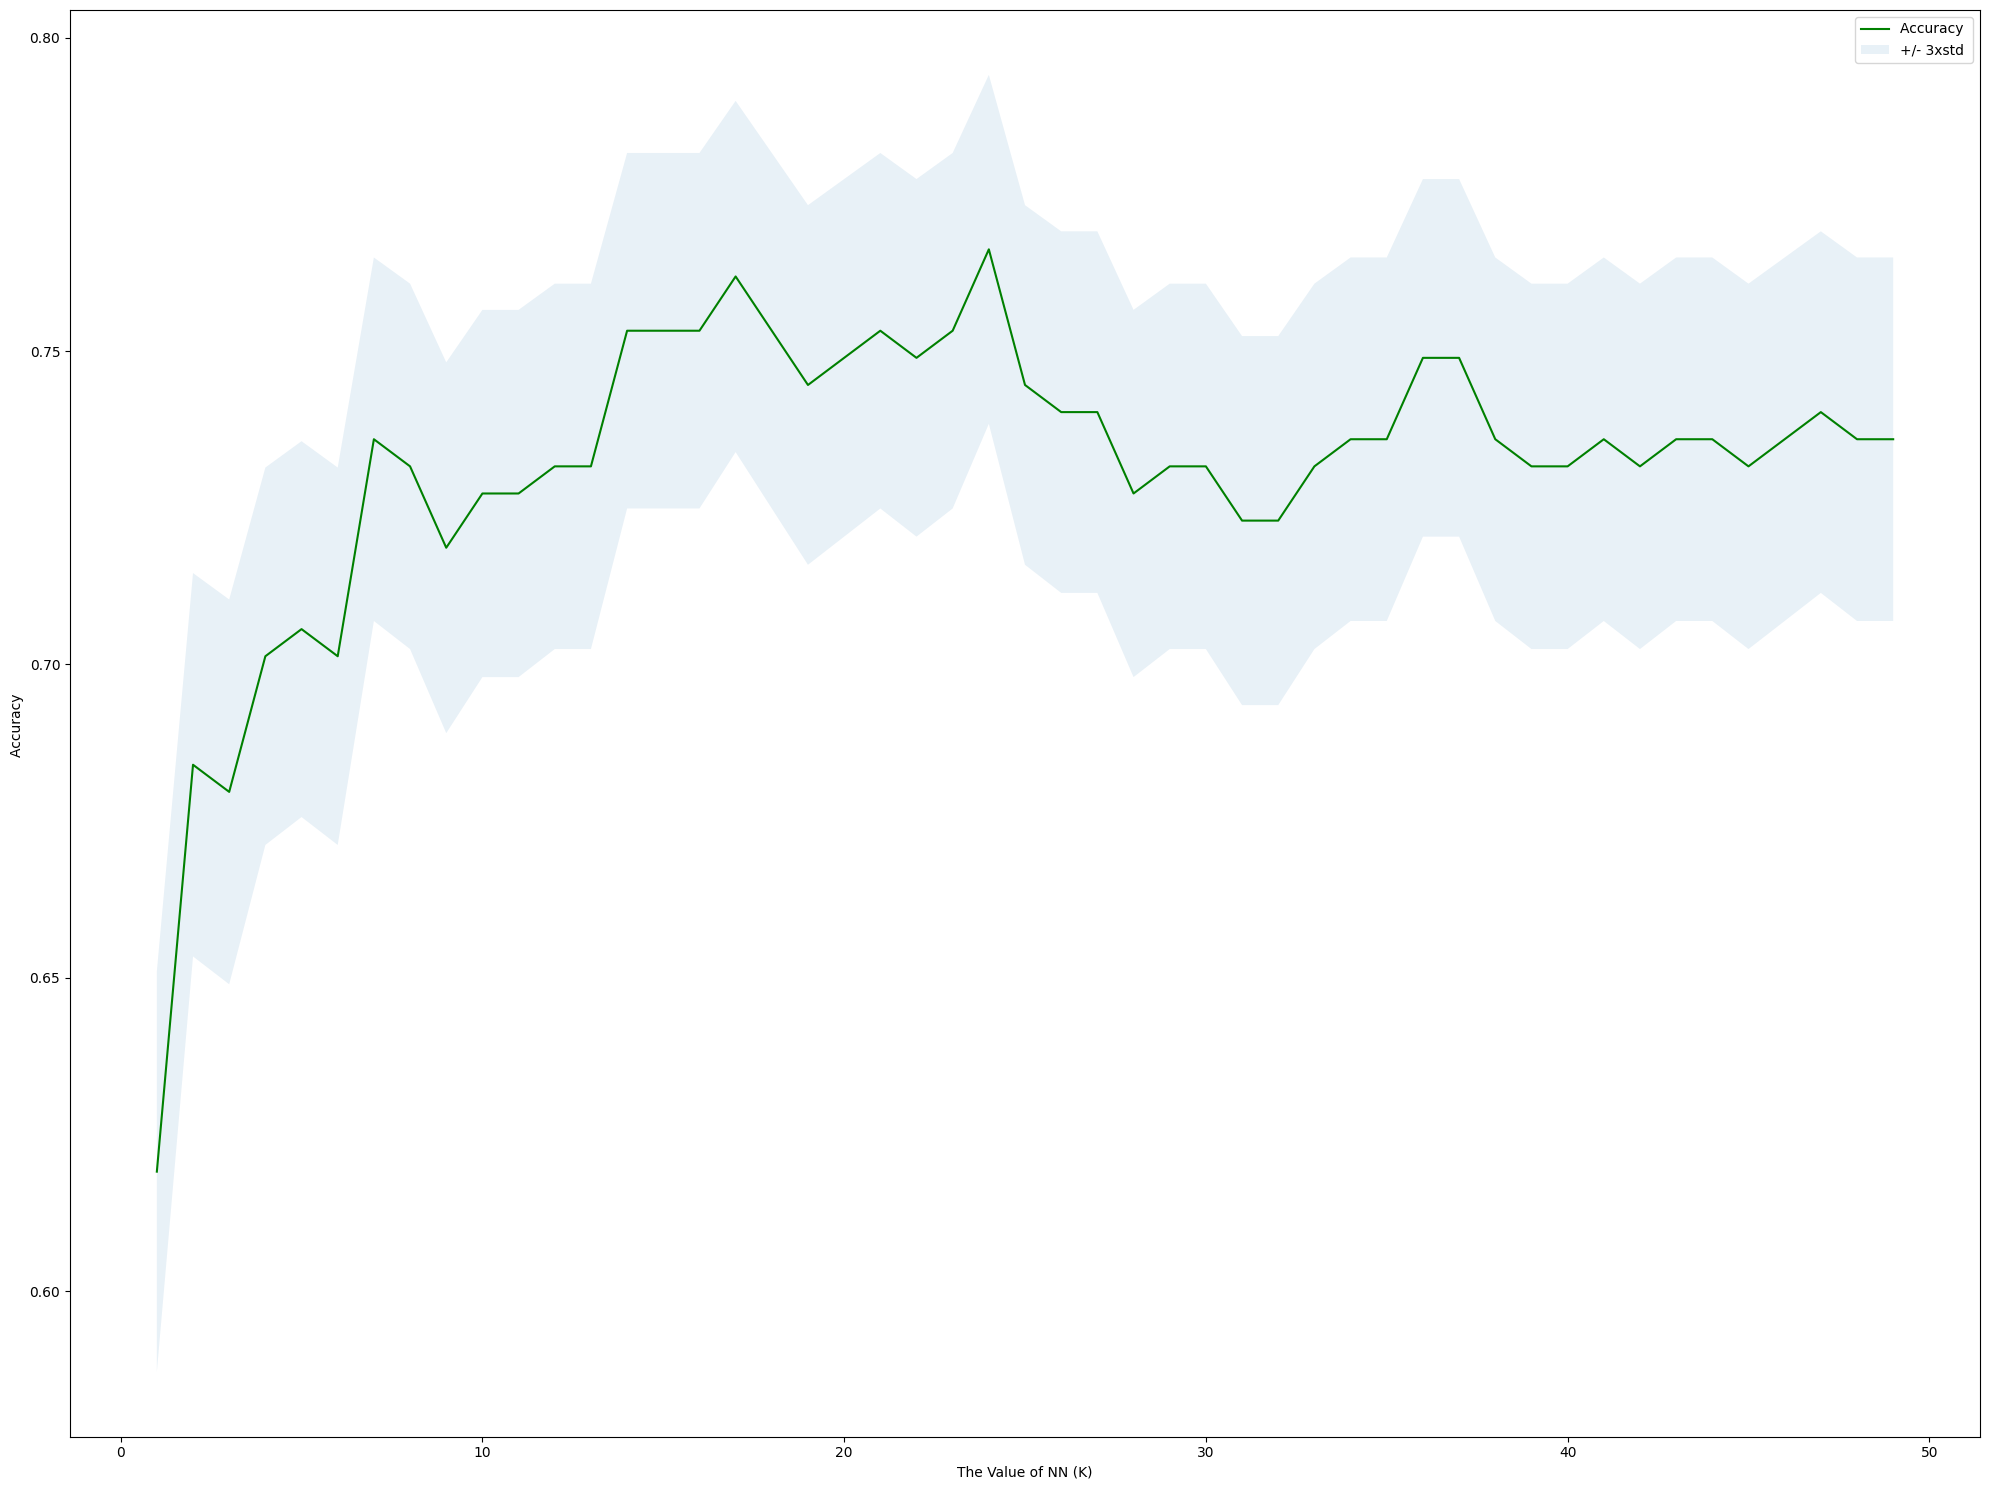



The best accuracy was with 0.7662337662337663 with k= 24


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np


Ks =50 #range of k
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#print (mean_acc)

print ('')
print ('')

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_hat)

print('The Confusion Matrix is=', cm)


print('')
print('TP is=', cm[0, 0])
print('TN is=', cm[1, 1])
print('FP is=', cm[0, 1])
print('FN is=', cm[1, 0])

The Confusion Matrix is= [[118  33]
 [ 35  45]]

TP is= 118
TN is= 45
FP is= 33
FN is= 35


In [ ]:
print ('The accuracy based in training set is:', neigh.score(X_train, y_train))
print ('The accuracy based in test set is:', neigh.score(X_test, y_test))

The accuracy based in training set is: 0.770949720670391
The accuracy based in test set is: 0.7359307359307359


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       151
           1       0.58      0.56      0.57        80

    accuracy                           0.71       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



In [ ]:
#0.76 under precision - number of correct predicted - TP
#0.59 under precision - number of correct predicted - TP
#0.81 under recall - how many times it recall or predicted correctly (actual answer)
#f1-score - harmonic mean of precision and recall (balance between both precision and recall)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import jaccard_score


DS = DecisionTreeClassifier()


#training

DS.fit(X_train, y_train) #any algorithms you use will come with the parameters #Come with the default values

#prediction

y_hat = DS.predict(X_test)

#evaluation

print('The accuracy is :', accuracy_score(y_test, y_hat))
print('')
print('The CM is:', confusion_matrix(y_test, y_hat))
print('')
print('The Jaccard Score is:', jaccard_score(y_test, y_hat, average='micro'))
print('')

The accuracy is : 0.7056277056277056

The CM is: [[112  39]
 [ 29  51]]

The Jaccard Score is: 0.5451505016722408

